In [7]:
import comparison as cmp
import numpy as np
import matplotlib.pyplot as plt
TWOPI = cmp.TWOPI

In [8]:
# RS = cmp.RoughSubstrate(l=3.0357142857142856,mu_f=5.34,R0=15,a=1,theta_g_0_flat=105.8,theta_e=55.6)
# RS = cmp.RoughSubstrate(l=3.5,mu_f=5.34,R0=15,a=1,theta_g_0_flat=105.8,theta_e=55.6)
# RS = cmp.RoughSubstrate(l=1.5,mu_f=5.34,R0=15,a=0.5,theta_g_0_flat=105.8,theta_e=55.6)

etaw = 0.69
Lx_sub = 20.7
n_sub = 16
l_sub = Lx_sub/n_sub

muf_md = 5.659896689453016
noise_md = 100*0.0054794921875

RS = cmp.RoughSubstrate(l=l_sub,mu_f=muf_md,R0=20,a=1.0,theta_g_0_flat=105.8,theta_e=55.6,Gamma=noise_md)

EM = cmp.EulerMurayama(RS=RS,t_fin=50.0,t_bin=0.1,M=25)
EM.simulate_ode(RS)
EM.simulate_sde(RS)

theta_w = RS.theta_w
print("theta_w       = "+str(theta_w)+" [deg]")
theta_fin_ode = EM.theta_g_vec[-1]
print("theta_fin_ode = "+str(theta_fin_ode)+" [deg]")
theta_fin_sde = np.mean(EM.theta_g_ens[int(0.8*EM.Nt):])
print("theta_fin_sde = "+str(theta_fin_sde)+" [deg]")

C.l. friction         = 5.659896689453016 [cP]
Corrugation length    = 1.29375 [nm]
Corrugation number    = 278.2608695652174 [1/nm]
Droplet radius        = 20 [nm]
Roughness coefficient = 1.0 [1]
Initial c.a. on flat  = 105.8 [deg]
Equilibrium c. a.     = 55.6 [deg]
Reference time        = 0.12668670141833632 [ns]
Corrugation height    = 0.00359375 [nm]
Initial c. a          = 109.33522738946891 [deg]
Initial c.l. distance = 22.446507277841263 [nm]
[TEST] : theta_g_0    = 109.33522738946891 [deg]
Noise (nondim.)       = 0.54794921875 [1]
Final time            = 50.0 [ns]
T_fin (nondim.)       = 394.67441681106965 [1]
dt (nondim.)          = 0.07893488336221394 [1]
#replicas             = 25
Simulating 25 replicates
theta_w       = 46.60661073717962 [deg]
theta_fin_ode = 100.09632580801367 [deg]
theta_fin_sde = 48.167983112026896 [deg]


<IPython.core.display.Javascript object>


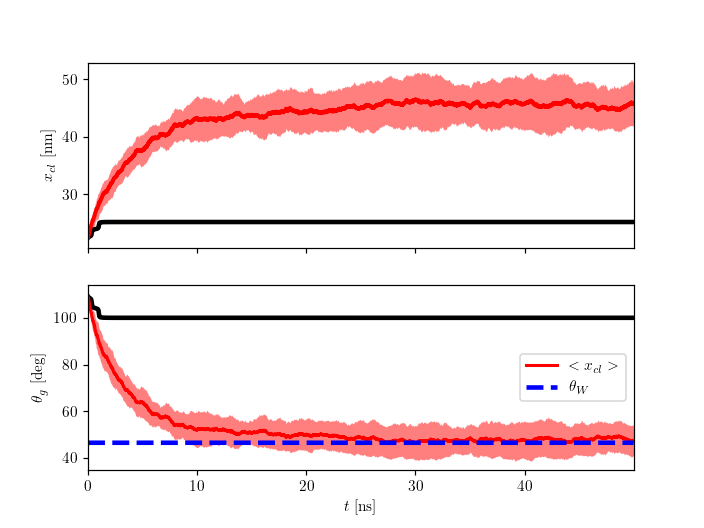

In [9]:
%matplotlib notebook
fig1, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(RS.tau*EM.t_vec, TWOPI*EM.x_vec/RS.k, 'k-', linewidth=3.0)
ax1.plot(RS.tau*EM.t_vec, TWOPI*EM.x_ens/RS.k, 'r-', linewidth=2.5)
ax1.fill_between(RS.tau*EM.t_vec,TWOPI*(EM.x_ens+EM.x_std)/RS.k,TWOPI*(EM.x_ens-EM.x_std)/RS.k,color='r',alpha=0.5,linewidth=0.0)
ax1.set_ylabel(r'$x_{cl}$ [nm]')#, fontsize=30.0)
ax1.set_xlim([RS.tau*EM.t_vec[0], RS.tau*EM.t_vec[-1]])
ax1.tick_params(axis='x',which='both',labelbottom=False)
ax1.tick_params(axis='y')#, labelsize=25)
ax2.plot(RS.tau*EM.t_vec, EM.theta_g_vec, 'k-', linewidth=3.0)
ax2.plot(RS.tau*EM.t_vec, EM.theta_g_ens, 'r-', linewidth=2.0, label=r'$<x_{cl}>$')
ax2.fill_between(RS.tau*EM.t_vec,EM.theta_g_ens+EM.theta_std,EM.theta_g_ens-EM.theta_std,color='r',alpha=0.5,linewidth=0.0)
ax2.plot(RS.tau*EM.t_vec, RS.theta_w*np.ones(EM.t_vec.shape), 'b--', linewidth=3, label=r'$\theta_W$')
ax2.set_xlabel(r'$t$ [ns]')#, fontsize=30.0)
ax2.set_ylabel(r'$\theta_g$ [deg]')#, fontsize=30.0)
ax2.set_xlim([RS.tau*EM.t_vec[0], RS.tau*EM.t_vec[-1]])
ax2.legend()#fontsize=25)
ax2.tick_params(axis='x')#, labelsize=25)
ax2.tick_params(axis='y')#, labelsize=25)
plt.show()

In [4]:
# EM.fit_cl_friction(RS,mv=10000)
EM.fit_cl_friction_ls(RS,mv=10000)

Eff. c.l. friction    = 55.64321275873417 [cP]


array([2.20386195, 1.47476326, 2.1216256 ])

<IPython.core.display.Javascript object>


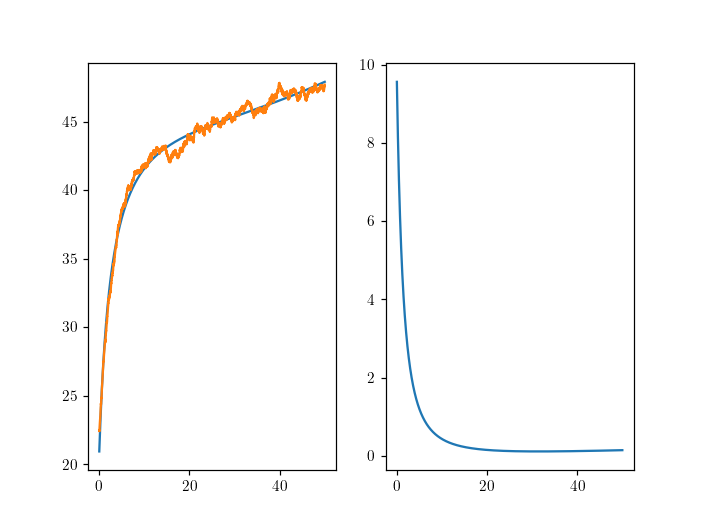

In [5]:
%matplotlib notebook
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(EM.t, EM.x_fit)
ax1.plot(EM.t, EM.x)
ax2.plot(EM.t, EM.v_fit)
plt.show()

<IPython.core.display.Javascript object>


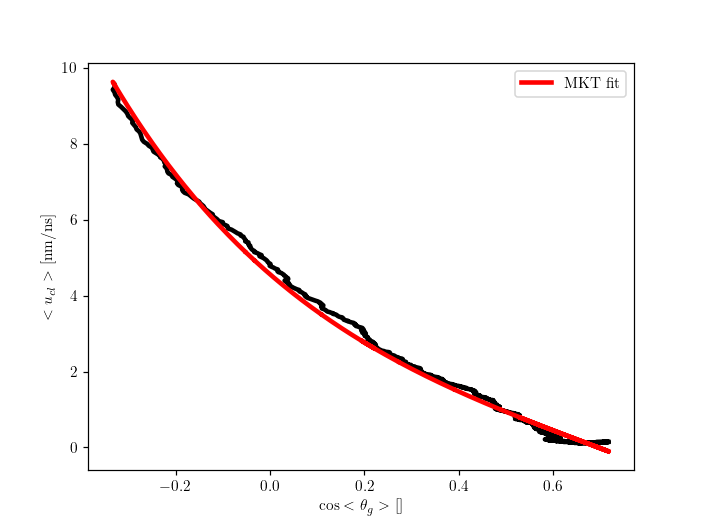

In [6]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1)
plt.plot(EM.ct, EM.v_fit, 'k-', linewidth=3.0)
plt.plot(EM.ct, EM.v_mkt, 'r-', linewidth=3.0, label='MKT fit')
plt.tick_params(axis='x')#, labelsize=25)
plt.tick_params(axis='y')#, labelsize=25)
plt.legend()#fontsize=25)
plt.xlabel(r'$\cos<\theta_g>$ []')#, fontsize=30.0)
plt.ylabel(r'$<u_{cl}>$ [nm/ns]')#, fontsize=30.0)
plt.show()